In [3]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from scipy.special import kn,zetac
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))
from scipy.interpolate import interp1d
import numpy as np

In [8]:
@np.vectorize
def nEQbottom(T):
    Zeta3 = 1.20206
    return 3*2*(3./4.)*Zeta3*T**3/np.pi**2

@np.vectorize
def nEQgluon(T):
    Zeta3 = 1.20206
    return 8*2*Zeta3*T**3/np.pi**2

lamb = 2.6e-7
#Annihilation rate for mediator
data = np.genfromtxt('./width_and_medxs.dat',skip_header=5)
dataR = np.genfromtxt('./sigmav_conversion_bchi-sbotg_500_510_1.dat',skip_header=6,usecols=(0,4))
conv = 0.8579e17

sLog = lambda x: interp1d(data[:,0],np.log(data[:,1]*conv),
                    fill_value='extrapolate',bounds_error=False)(x)
cRateLog = lambda x: interp1d(dataR[:,0],np.log(dataR[:,1]*conv*(lamb)**2),
                    fill_value='extrapolate',bounds_error=False)(x)

#Conversion rates for DM and mediator: 
dofDM = -2 #Number of DM degrees of freedom (Majorana fermion)
dofMed = 6 #Number of Mediator degrees of freedom (complex colored scalar)

msbot = 510.
mDM = 500

@np.vectorize
def sigmaVJan(T):
    x = 500./T
    if x > data[:,0].max():
        return 0.
    sF = sLog(x)
    return np.exp(sF)

@np.vectorize
def cRateDMJan(T):
    x = 500./T
    if x > dataR[:,0].max():
        return 0.
    sF = cRateLog(x)
    return 2*nEQbottom(T)*np.exp(sF)

@np.vectorize
def cRateMedJan(T):
    x = 510./T
    if x > dataR[:,0].max():
        return 0.
    sF = cRateLog(x)
    return 2*nEQgluon(T)*np.exp(sF)*abs(dofMed/dofDM)*np.exp((510.-500.)/T)

In [9]:
Tpts = np.logspace(4,-2,100)

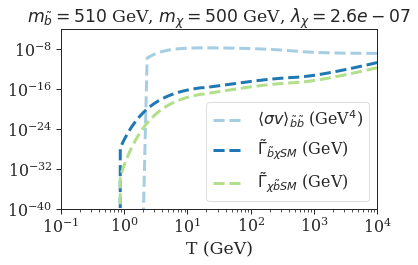

In [36]:
plt.plot(Tpts,sigmaVJan(Tpts),'--',label=r'$\langle \sigma v \rangle_{\tilde{b} \tilde{b}}$ (GeV$^4$)',linewidth=3)
plt.plot(Tpts,cRateMedJan(Tpts),'--',label=r'$\tilde{\Gamma}_{\tilde{b} \chi SM}}$ (GeV)',linewidth=3)
plt.plot(Tpts,cRateDMJan(Tpts),'--',label=r'$\tilde{\Gamma}_{\chi \tilde{b} SM}}$ (GeV)',linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40,1e-4)
plt.xlim(0.1,1e4)
plt.title(r'$m_{\tilde{b}} = %3.0f$ GeV, $m_{\chi} = %3.0f$ GeV, $\lambda_{\chi} = %1.3g$' %(msbot,mDM,lamb))
plt.xlabel('T (GeV)')
plt.legend()
plt.tight_layout()
plt.savefig('rates.png')
plt.show()